In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from aicsimageio import AICSImage
import pyvips
import os, time

In [8]:
DATA_DIR = "/home/haehn/Downloads/"
SCAN = "W408B - 2.czi"
SHORT_SCAN = "W408B"

OUTPUT_DIR = "web/" + SHORT_SCAN

In [4]:
img = AICSImage(os.path.join(DATA_DIR, SCAN))

In [5]:
slices = []
for i,s in enumerate(img.scenes):
    t0 = time.time()
    
    stack = img.get_stack(select_scenes=[i])
    
    r = stack[0,0,0,0,:,:,2].astype(float)
    r /= r.max()
    r *= 255
    r = r.astype(np.uint8)
    g = stack[0,0,0,0,:,:,1].astype(float)
    g /= g.max()
    g *= 255
    g = g.astype(np.uint8)
    b = stack[0,0,0,0,:,:,0].astype(float)
    b /= b.max()
    b *= 255
    b = b.astype(np.uint8)
    
    arr = np.stack((r,g,b), axis=-1)
    slices.append( arr )
    print('Done loading scene', i, 'after', time.time()-t0)

Done loading scene 0 after 13.506629705429077
Done loading scene 1 after 11.14598035812378
Done loading scene 2 after 12.108970880508423
Done loading scene 3 after 10.896578073501587


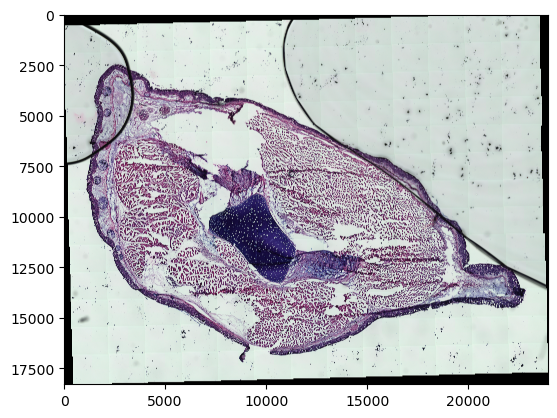

In [6]:
imshow(slices[0])

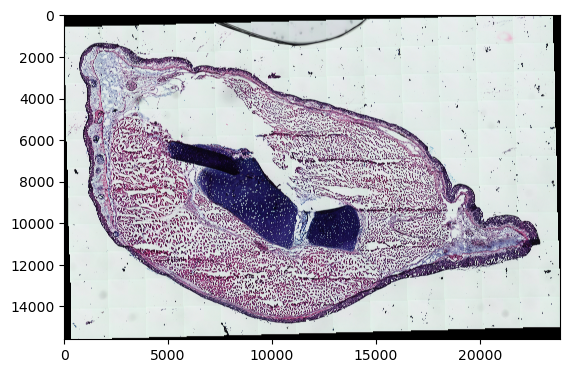

In [7]:
imshow(slices[1])

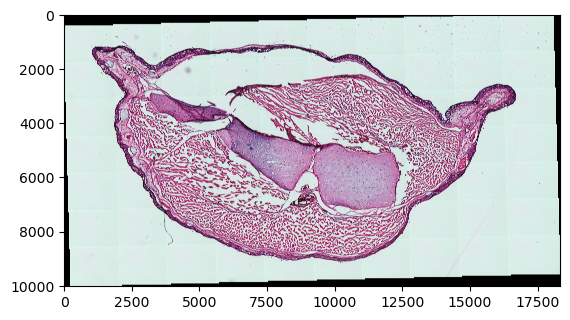

In [8]:
imshow(slices[2])

In [9]:
for i,s in enumerate(slices):
    t0 = time.time()
    vips_img = pyvips.Image.new_from_array(s)
    vips_img.dzsave(OUTPUT_DIR+'_'+str(i))
    print('Done converting scene', i, 'after', time.time()-t0)

Done converting scene 0 after 9.871216535568237
Done converting scene 1 after 8.438585042953491
Done converting scene 2 after 9.26169204711914
Done converting scene 3 after 8.57879376411438
